# Generating synthetic data sets of a river bed column forced by monoperiodic river and aquifer temperature signals


In [1]:
# démo time_series
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

## 1. Signal Parameterization
The signals are purely periodic, and it is necessary to choose the amplitude, period, and mean value of the river temperature, aquifer temperature, and pressure signals (boundary conditions). The T1, T2, T3 sensors in the shaft are only generated using the direct model.

A possible improvement for this class is to generate multi-periodic signals similar to the parameter lists of the layer, where a list of parameters for the different desired frequencies (diurnal, monthly, annual, etc.) would be provided.

In [2]:
t_debut = (2011, 1, 1)
t_fin = (2011, 2, 28, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s)

"""Conditions limites"""
# Température de la rivière
zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 1
T_riv_offset = 12  + zeroT
nday = 1
P_T_riv = nday*NHOURINDAY*4*dt #monthly   period
# Température de l'aquifère
T_aq_amp = 0
T_aq_offset = 12 + zeroT
P_T_aq = -9999 # à mettre dans le init
# Pression différentielle
dH_amp = 0
dH_offset = .5 #1meter ?
P_dh = -9999 #14*24*4*dt


depth_sensors = [1, 2, 3, 4]
Zbottom = 4

"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

print("dt={0:.1f}s".format(dt))

dt=900.0s


## 2 Instantiating the objects `synthetic_MOLONARI` and `Column`
The generated object will have default values, and a series of methods must be used to update its essential parameters. In the initialisation of Time Series, the 3 intermediate temperature sensors T1, T2, T3, are initialized with a linear interpolation between Triv and Taq weighted by the distance from the sensor. Those values initialize the soil Column in a second step. For Time Series dH = Hriv-Haq

#### Creating a multi-periodic signal

To do this, we have changed the signal generating function and now the `param_T_riv_signal` is a list of lists. Following this structure : 

```python
"param_T_riv_signal": [[T_riv_amp0, P_T_riv0, T_riv_offset0], ..., [T_riv_ampN, P_T_rivN, T_riv_offsetN]]
```

In [8]:
#liste_params_river = [[2*T_riv_amp, P_T_riv/2, 0], [T_riv_amp, P_T_riv, T_riv_offset], [0.5*T_riv_amp, 2*P_T_riv, 0], [0.2*T_riv_amp, 3*P_T_riv, 0], [0.7*T_riv_amp, 5*P_T_riv, 0]]
liste_params_river = [[T_riv_amp, P_T_riv, T_riv_offset], [0.5*T_riv_amp, 2*P_T_riv, 0], [0.5*T_riv_amp, 3*P_T_riv, 0], [0.5*T_riv_amp, 5*P_T_riv, 0], [0.1*T_riv_amp, 7*P_T_riv, 0]]

param_T_riv_signal is a list of list, generating multi periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 1, 1), (2011, 2, 28, 23, 59, 59), 900]
param_dH_signal: [0, -9999, 0.5]
param_T_riv_signal: [[1, 86400, 285.15], [0.5, 172800, 0], [0.5, 259200, 0], [0.5, 432000, 0], [0.1, 604800, 0]]
param_T_aq_signal: [0, -9999, 285.15]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 0.5, dt 900.0 --> 
constant signal

Multiple periodic signals detected, summing them up.


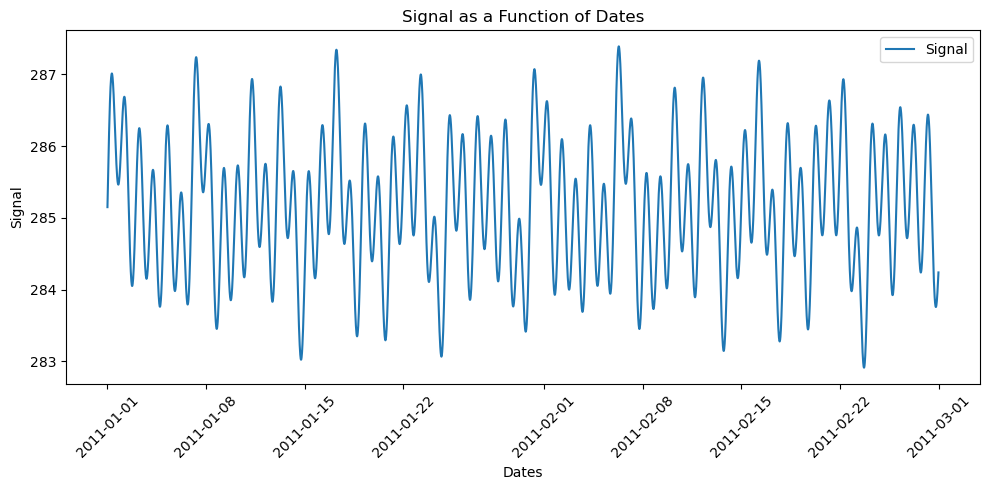

Single periodic signal detected, using create_periodic_signal function.
Entering T_aq generation with amplitude 0, period of -9999, offset 285.15, dt 900.0 --> 
constant signal

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [285.14999542 285.22509155 285.30000458 ... 284.40212402 284.43462524
 284.46765289]
Temperature of Sensor 1 : [285.14999695 285.20006104 285.25000305 ... 284.65141602 284.6730835
 284.69510193]
Temperature of Sensor 2 : [285.14999847 285.17503052 285.20000153 ... 284.90070801 284.91154175
 284.92255096]
Temperature of Sensor 3 : [285.15 285.15 285.15 ... 285.15 285.15 285.15]


In [9]:
"""Instanciation de l'objet Time_series"""
# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal":liste_params_river, #list of list for multiperiodic signal
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
# instanciation du simulateur de données
emu_observ_test_user1 = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


# print(f"dH : {emu_observ_test_user1._molonariP_data}")
# print(f"Tshaft : {emu_observ_test_user1._T_Shaft_measures}")


### Quick spectral analysis of the signal.

Text(0, 0.5, 'River Temperature (K)')

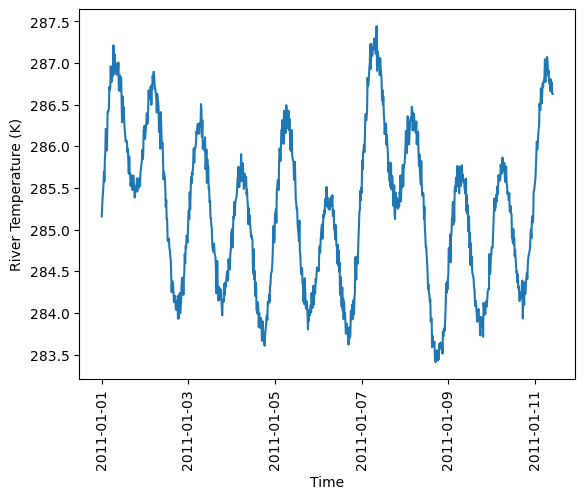

In [10]:
plt.plot(emu_observ_test_user1._dates[:1000], emu_observ_test_user1._T_riv[:1000])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('River Temperature (K)')

Dominant period ≈ 1.0000 days (freq = 1.157e-05 Hz)


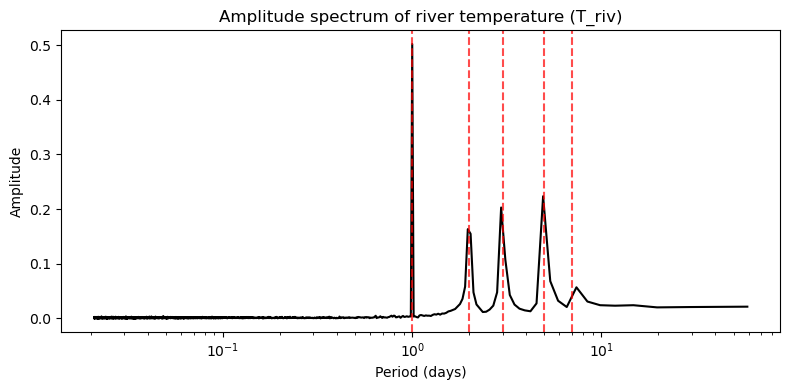

In [11]:
# Simple spectrum of the river temperature signal (T_riv)
y = np.asarray(emu_observ_test_user1._T_riv)
n = y.size
y = y - np.mean(y)   # remove DC

yf = np.fft.rfft(y)
amp = np.abs(yf) / n
freqs = np.fft.rfftfreq(n, d=dt)  # cycles per second

# Periods no longer than 10 days (i.e. frequencies > 1/10 days)

mask = freqs > 1/8640000  # 10 days in seconds
period_days = 1.0 / freqs[mask] / NSECINDAY  # convert period to days

plt.figure(figsize=(8, 4))
plt.plot(period_days, amp[mask], '-k')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum of river temperature (T_riv)')

# mark the input forcing periods (if defined in liste_params_river)
try:
    input_periods = [p[1] for p in liste_params_river if p[1] > 0]
    for p in input_periods:
        plt.axvline(p / NSECINDAY, color='r', linestyle='--', alpha=0.7)
except Exception:
    pass

# report dominant period
if amp[mask].size:
    idx = np.argmax(amp[mask])
    dom_period_days = period_days[idx]
    print(f"Dominant period ≈ {dom_period_days:.4f} days (freq = {freqs[mask][idx]:.3e} Hz)")

plt.tight_layout()
plt.show()

Find dominant peaks with `find_peaks`.

Found 5 peaks (showing top 5 by amplitude):

Rank | Period (days) | Amplitude | Prominence
   1 |       1.0000 | 5.021e-01 | 5.003e-01
   2 |       4.9167 | 2.236e-01 | 2.034e-01
   3 |       2.9500 | 2.030e-01 | 1.899e-01
   4 |       1.9667 | 1.634e-01 | 1.516e-01
   5 |       7.3750 | 5.694e-02 | 3.606e-02


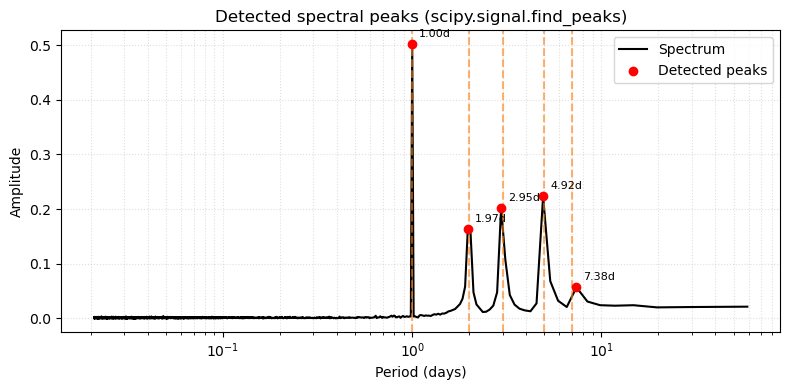

In [12]:
from scipy.signal import find_peaks

# Find dominant spectral peaks using scipy.signal.find_peaks

# Use existing variables from the notebook:
# - amp (full FFT amplitude array)
# - freqs (full frequency array)
# - period_days (periods corresponding to freqs[mask], in days)
# - mask (boolean mask used earlier to select period range)
# - liste_params_river / input_periods (optional reference forcing periods)

# Prepare masked arrays
amp_masked = amp[mask]
periods_masked = period_days
freqs_masked = freqs[mask]

# Peak detection: require a minimal prominence relative to the strongest peak
if amp_masked.size == 0:
    print("No spectral data available in the masked frequency range.")
else:
    prom_thresh = np.max(amp_masked) * 0.05  # tuneable (5% of max amplitude)
    peaks, props = find_peaks(amp_masked, prominence=prom_thresh)

    if peaks.size == 0:
        print("No peaks found with the chosen prominence threshold.")
    else:
        # Sort peaks by amplitude descending
        peak_amps = amp_masked[peaks]
        order = np.argsort(peak_amps)[::-1]
        top_n = min(10, peaks.size)

        print(f"Found {peaks.size} peaks (showing top {top_n} by amplitude):\n")
        print("Rank | Period (days) | Amplitude | Prominence")
        for r in range(top_n):
            idx = peaks[order[r]]
            print(f"{r+1:4d} | {periods_masked[idx]:12.4f} | {amp_masked[idx]:9.3e} | {props['prominences'][np.where(peaks==idx)][0]:9.3e}")

        # Quick plot with peaks annotated
        plt.figure(figsize=(8,4))
        plt.plot(periods_masked, amp_masked, '-k', label='Spectrum')
        plt.scatter(periods_masked[peaks], amp_masked[peaks], color='red', zorder=3, label='Detected peaks')
        for i in order[:top_n]:
            pi = peaks[i]
            plt.annotate(f"{periods_masked[pi]:.2f}d", (periods_masked[pi], amp_masked[pi]),
                         xytext=(5,5), textcoords='offset points', fontsize=8)

        # Mark input forcing periods if available
        try:
            input_days = [p[1] / NSECINDAY for p in liste_params_river if p[1] > 0]
            for pday in input_days:
                plt.axvline(pday, color='C1', linestyle='--', alpha=0.6)
        except Exception:
            pass

        plt.xscale('log')
        plt.xlabel('Period (days)')
        plt.ylabel('Amplitude')
        plt.title('Detected spectral peaks (scipy.signal.find_peaks)')
        plt.legend()
        plt.grid(True, which='both', ls=':', alpha=0.4)
        plt.tight_layout()
        plt.show()

Maintenant on génère la couche

In [192]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":11,
    "n": 0.1,
    "lambda_s": 1,
    "rhos_cs": 4e6,
    "q": 0,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 100
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": 4.0, 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col = Column.from_dict(col_dict,verbose=True)
col.set_layers(Layer1)

Layer: Couche en sable : ends at 4 m. Param(moinslog10IntrinK=11, n=0.1, lambda_s=1, rhos_cs=4000000.0, q=0)
Column created with success
Number of time steps: 5664
Time step in days: 0.01041482756591337
T_riv: [285.08374 285.16437 285.40775 ... 284.1353  284.31332 284.27942]
T_aq: [285.19436139 285.17293071 285.21676734 ... 285.12573889 285.0798614
 285.26016429]
dH : [0.5007161  0.49914461 0.50077934 ... 0.50024016 0.499933   0.49939754]
list of dates   : [datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 15), datetime.datetime(2011, 1, 1, 0, 30), datetime.datetime(2011, 1, 1, 0, 45), datetime.datetime(2011, 1, 1, 1, 0), datetime.datetime(2011, 1, 1, 1, 15), datetime.datetime(2011, 1, 1, 1, 30), datetime.datetime(2011, 1, 1, 1, 45), datetime.datetime(2011, 1, 1, 2, 0), datetime.datetime(2011, 1, 1, 2, 15), datetime.datetime(2011, 1, 1, 2, 30), datetime.datetime(2011, 1, 1, 2, 45), datetime.datetime(2011, 1, 1, 3, 0), datetime.datetime(2011, 1, 1, 3, 15), datetime.d

In [193]:
col.compute_solve_transi()

--- Compute Solve Transi ---
One layer : moinslog10IntrinK = 11, n = 0.1, lambda_s = 1, rhos_cs = 4000000.0, q = 0
Solving the flow with intrinsec permeability 1e-11, and permeability 9.810000000000001e-05
Done.


## 3 Generating temperature in the river bed

We use the [_measures_column_one_layer(col, layers_list)] method, which updates the measurements for T1, T2 and T3 at each point in time with the direct model pyheatmy. The sensor time series are then perturbated with a gaussian noise in the Time series object. We display the temperature simulated at sensors.

In [194]:
# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user1._measures_column_one_layer(col)
#emu_observ_test_user1._plot_molonariT_data()
#col.plot_temperature_at_sensors(verbose=False)

The simulated temperatures with pyheatmy are compared to the initial values of the Shaft which were interpolated. Without surprise, they are very different for an advective configuration (high k value)

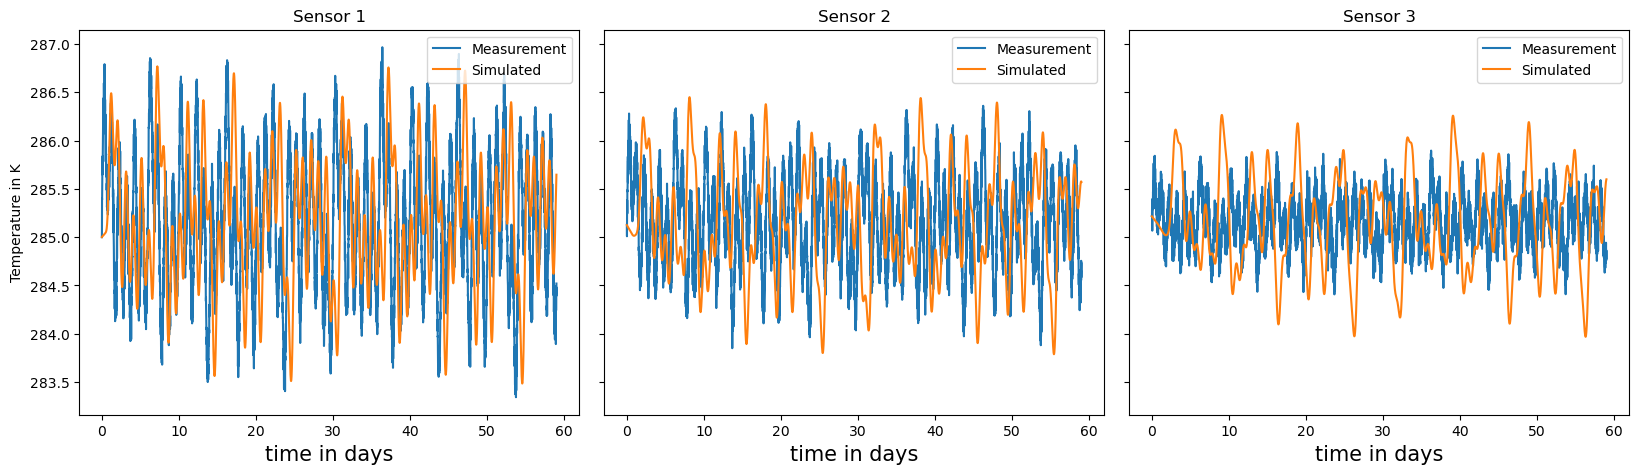

In [195]:
col.plot_compare_temperatures_sensors()

### On récupère les profils issus des capteurs.

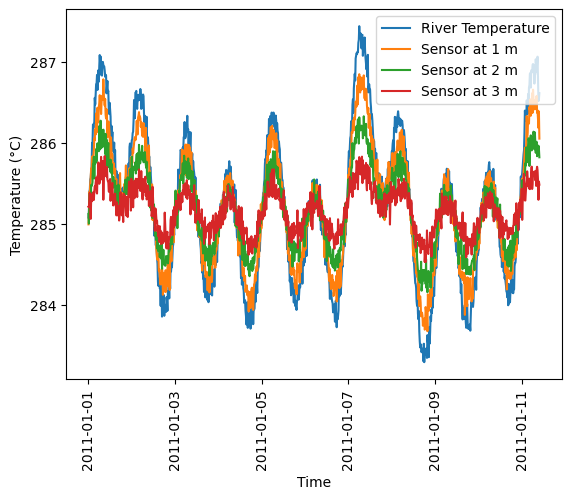

In [196]:
plt.plot(emu_observ_test_user1._dates[:1000], emu_observ_test_user1._T_riv[:1000], label="River Temperature")

for i in range(3):
    plt.plot(emu_observ_test_user1._dates[:1000], col._T_measures[:, i][:1000], label=f"Sensor at {depth_sensors[i]} m")
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

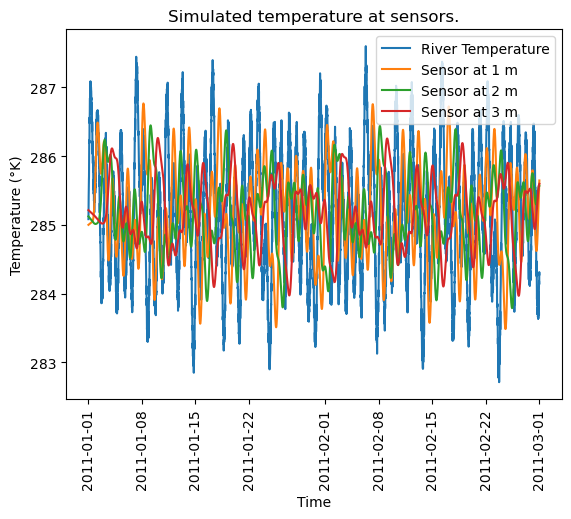

In [197]:
temperatures_mes = col.get_temperature_at_sensors()

plt.plot(emu_observ_test_user1._dates, emu_observ_test_user1._T_riv, label="River Temperature")
for i in range(1, 4):
    plt.plot(emu_observ_test_user1._dates, temperatures_mes[i], label=f"Sensor at {depth_sensors[i-1]} m")


plt.title("Simulated temperature at sensors.")
plt.xlabel('Time')
plt.ylabel('Temperature (°K)')
plt.xticks(rotation=90)
plt.legend()

In [198]:
idx_begin = 200
idx_end = 3000

dates_mes = emu_observ_test_user1._dates[idx_begin:idx_end].copy()

# Truncate the time axis of temperatures_mes to the selected window.
# temperatures_mes is a numpy array shaped (n_signals, n_time), so slice on axis 1.
temperatures_mes = temperatures_mes[:, idx_begin:idx_end]



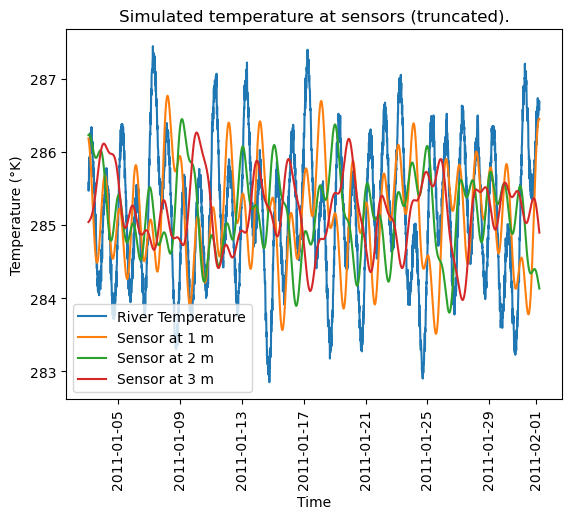

In [199]:
plt.plot(dates_mes, temperatures_mes[0], label="River Temperature")
for i in range(1, 4):
    plt.plot(dates_mes, temperatures_mes[i], label=f"Sensor at {depth_sensors[i-1]} m")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°K)")
plt.title("Simulated temperature at sensors (truncated).")
plt.xticks(rotation=90)
plt.show()

Defining what are the signals of interest.

In [200]:
signals = [
    temperatures_mes[0],  # River temperature
    temperatures_mes[1],  # Sensor at depth_sensors[0]
    temperatures_mes[2],  # Sensor at depth_sensors[1]
    temperatures_mes[3],  # Sensor at depth_sensors[2]
]

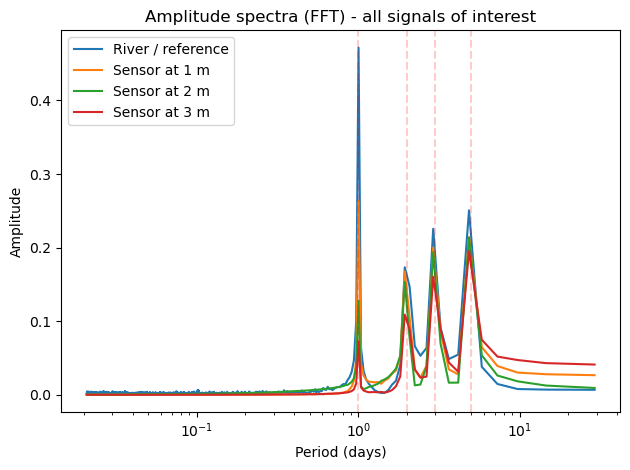

In [201]:
# FFT of the signals of interest on a single plot
sig_arr = np.asarray(signals)           # shape (n_signals, n_time)
n_signals, n_time = sig_arr.shape

freqs = np.fft.rfftfreq(n_time, d=dt)  # cycles per second
mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY

plt.figure(figsize=(6.4, 4.8))
cmap = plt.get_cmap("tab10")
for i in range(n_signals):
    y = sig_arr[i].astype(float)
    y -= np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time
    label = "River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"
    plt.plot(period_days, amp[mask], color=cmap(i % 10), label=label)

# mark input forcing periods (if available)
try:
    input_periods_days = [p[1] / NSECINDAY for p in liste_params_river if p[1] > 0]
    for pday in input_periods_days:
        plt.axvline(pday, color='r', linestyle='--', alpha=0.2)
except Exception:
    pass

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectra (FFT) - all signals of interest')
plt.legend()
plt.tight_layout()
plt.show()

Now extract the amplitudes at the peaks.

In [202]:
# Create the list of amplitudes for each input period.

amplitudes_at_peaks = []

for i in range(n_signals):
    
    y = sig_arr[i].astype(float)
    y -= np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time

    phase = np.angle(yf)
    
    # Now find the amplitudes corresponding to the input periods.
    amps_for_signal = []
    for p in input_periods_days:
        # Find the index of the closest frequency to the input period.
        target_freq = 1.0 / (p * NSECINDAY)
        idx = (np.abs(freqs - target_freq)).argmin()
        amps_for_signal.append(amp[idx])

    amplitudes_at_peaks.append(amps_for_signal)

amplitudes_at_peaks = np.array(amplitudes_at_peaks)  # shape (n_signals, n_input_periods)
print(amplitudes_at_peaks)

[[0.47164165 0.17319057 0.22555211 0.25069011]
 [0.26315824 0.16755272 0.20000298 0.21437782]
 [0.12766809 0.15339994 0.19393911 0.21356521]
 [0.07270767 0.10898218 0.16031676 0.1951513 ]]


Now we can try to fit to a power law $-a z$, the decay of the amplitudes for each period.

Amplitudes for River / reference: [0.47164165 0.17319057 0.22555211 0.25069011]
Amplitudes for Sensor at 1 m: [0.26315824 0.16755272 0.20000298 0.21437782]
Amplitudes for Sensor at 2 m: [0.12766809 0.15339994 0.19393911 0.21356521]
Amplitudes for Sensor at 3 m: [0.07270767 0.10898218 0.16031676 0.1951513 ]


Text(0, 0.5, 'Amplitude at peak')

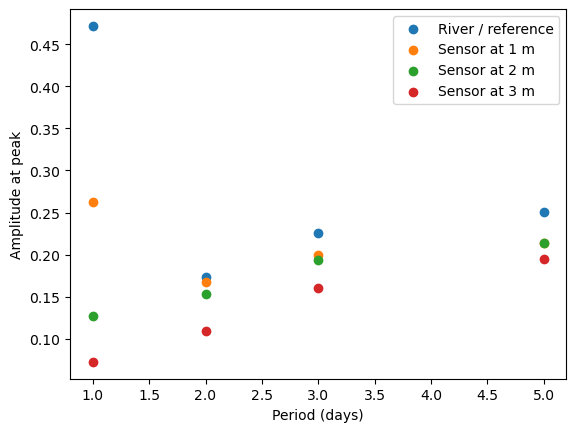

In [203]:
for i in range(n_signals):
    label = "River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"
    print(f"Amplitudes for {label}: {amplitudes_at_peaks[i]}")

for i in range(n_signals):
    plt.scatter(input_periods_days, amplitudes_at_peaks[i], marker='o', label=("River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"))

plt.legend()
plt.xlabel("Period (days)")
plt.ylabel("Amplitude at peak")

In [204]:
input_periods_days

[1.0, 2.0, 3.0, 5.0]


--- Analyse de l'amortissement de l'amplitude avec la profondeur ---


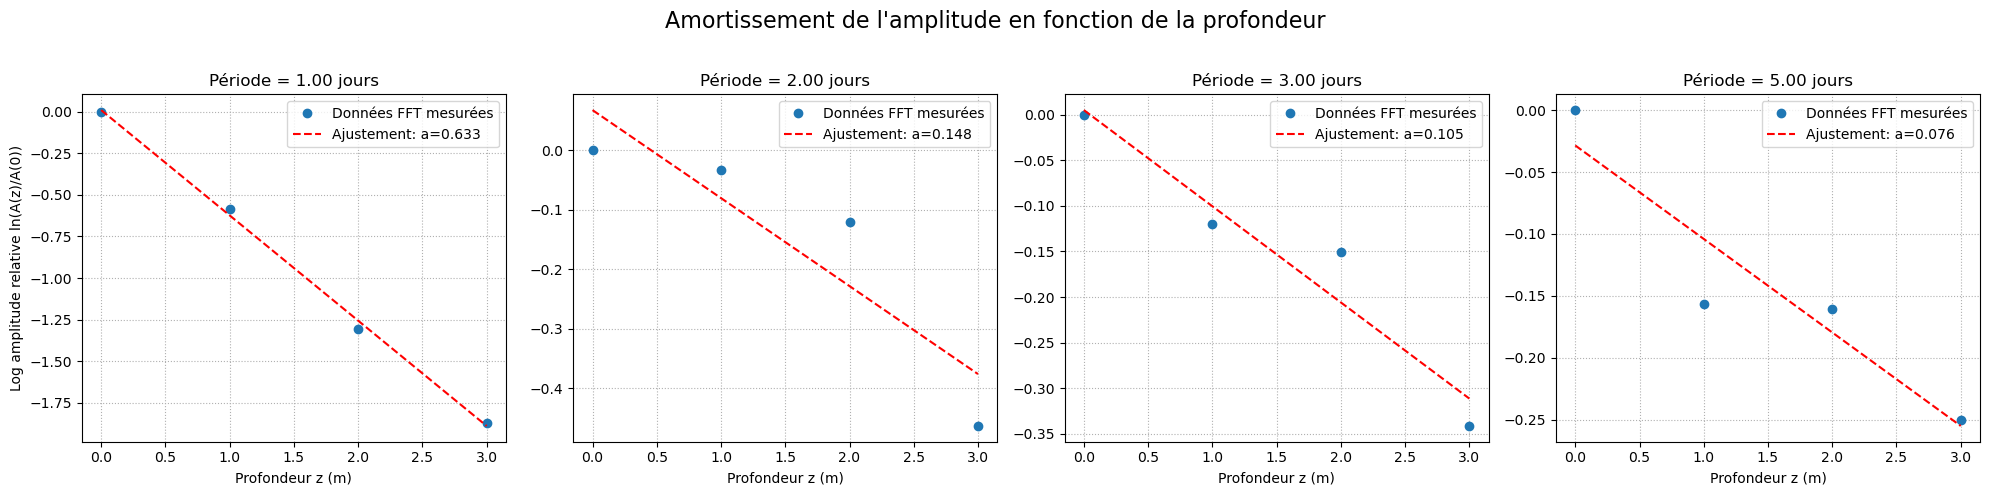

In [205]:
z_values = np.array([0] + depth_sensors[:-1]) 
n_periods = len(input_periods_days)

fig, axs = plt.subplots(1, n_periods, figsize=(5 * n_periods, 5), sharey=False)

# S'il n'y a qu'un seul subplot, axs n'est pas un tableau. On le met dans une liste pour que la boucle fonctionne.
if n_periods == 1:
    axs = [axs]

print("\n--- Analyse de l'amortissement de l'amplitude avec la profondeur ---")

a_values = []

# Boucle sur chaque période de forçage pour créer un subplot
for i, period in enumerate(input_periods_days):
    ax = axs[i] # Sélectionne l'axe du subplot courant

    # Extraire les amplitudes pour cette période
    amplitudes_for_period = amplitudes_at_peaks[:, i]
    
    # Amplitude de la rivière (référence à z=0)
    amplitude_river = amplitudes_for_period[0]
    
    # Calculer l'amplitude relative A(z)/A(0)
    if amplitude_river > 0:
        amplitude_ratio = amplitudes_for_period / amplitude_river
    else:
        # Éviter la division par zéro si l'amplitude de la rivière est nulle
        amplitude_ratio = np.full_like(amplitudes_for_period, np.nan)
    
    log_amplitude_ratio = np.log(amplitude_ratio)


    # Tracer les données "mesurées" (points)
    ax.plot(z_values, log_amplitude_ratio, 'o', label='Données FFT mesurées')

    # Fit ln(A(z)/A(0)) = -az
    if np.all(np.isfinite(log_amplitude_ratio)):
        # Ajustement linéaire pour trouver a
        coeffs = np.polyfit(z_values, log_amplitude_ratio, 1)
        a_fit = -coeffs[0]
        ax.plot(z_values, np.polyval(coeffs, z_values), 'r--', label=f'Ajustement: a={a_fit:.3f}')
        a_values.append(a_fit)

    # Mise en forme du subplot
    ax.set_title(f'Période = {period:.2f} jours')
    ax.set_xlabel('Profondeur z (m)')
    ax.legend()
    ax.grid(True, which='both', linestyle=':')

# Mise en forme globale de la figure
axs[0].set_ylabel('Log amplitude relative ln(A(z)/A(0))') # Label Y uniquement pour le premier graphique
fig.suptitle("Amortissement de l'amplitude en fonction de la profondeur", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajuste pour laisser de la place au titre principal
plt.show()


Extract the phase shifts. For a given period, compute the phase $\phi(P)$ and make it unwrapped. Then compare the phase for a given period between the depths.

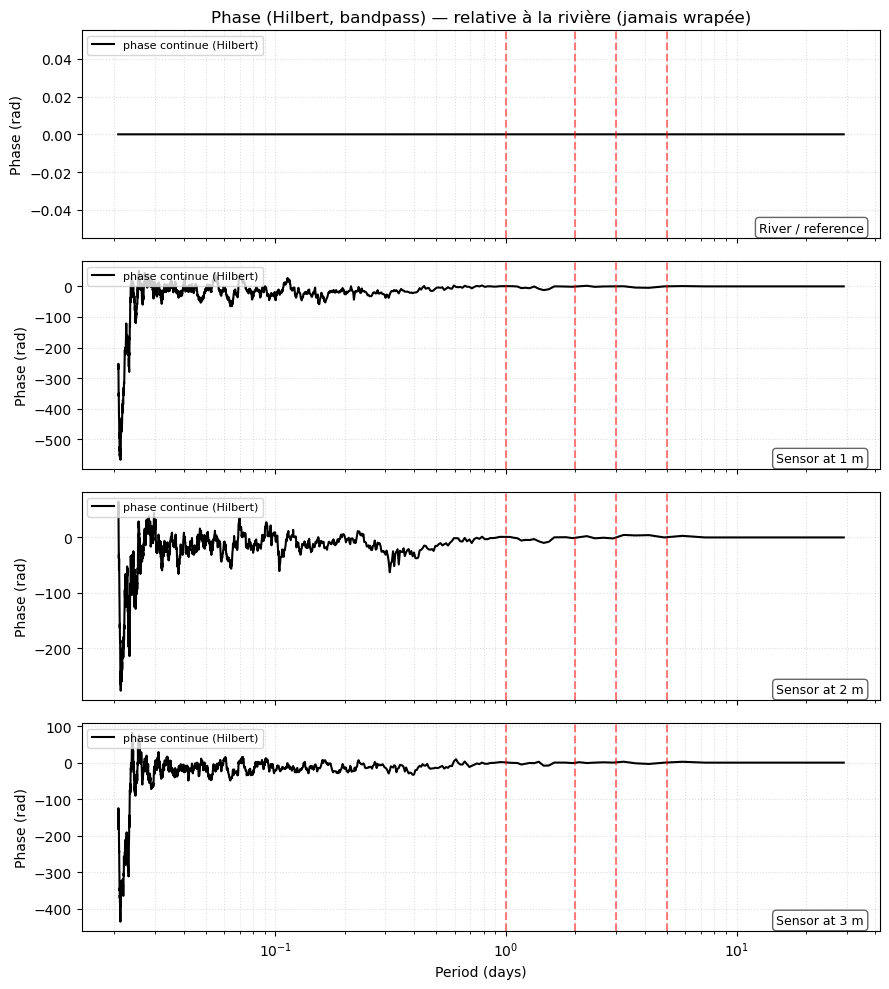

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert

# ------------------ helpers ------------------

def to_seconds(dates):
    return (dates - dates[0]).astype('timedelta64[s]').astype(float)

def regularize(t, y):
    """Rééchantillonne sur une grille régulière (dt = médiane)."""
    t = np.asarray(t, float); y = np.asarray(y, float)
    m = np.isfinite(t) & np.isfinite(y)
    t = t[m]; y = y[m]
    dt = np.median(np.diff(t))
    if dt <= 0:
        raise ValueError("timestamps non croissants")
    tg = np.arange(t[0], t[-1] + 0.5*dt, dt)
    yg = np.interp(tg, t, y)
    return tg, yg, 1.0/dt

def butter_band(f0, fs, bw_frac=0.2, order=4):
    """Passe-bande centré f0, largeur relative bw_frac (par ex. 0.2 = ±10%)."""
    ny = fs/2
    fl = max(1e-8, f0*(1 - bw_frac/2))
    fh = min(ny*0.99, f0*(1 + bw_frac/2))
    if fl >= fh:
        raise ValueError(f"Bande invalide: fl={fl:.3e} >= fh={fh:.3e}")
    b, a = butter(order, [fl/ny, fh/ny], btype='band')
    return b, a

def analytic_signal(t, y, f0, bw_frac=0.2, order=4):
    """Filtrage bandpass puis signal analytique (complexe)."""
    tg, yg, fs = regularize(t, y)
    b, a = butter_band(f0, fs, bw_frac=bw_frac, order=order)
    yf = filtfilt(b, a, yg)                  # zéro-phase
    z = hilbert(yf)                           # signal analytique
    return tg, z, fs

def continuous_phase_from_complex(z):
    """
    Phase absolue continue SANS wrapping:
    phi[0]=0; phi[k+1]=phi[k] + arg( z[k+1]/z[k] ).
    """
    z = np.asarray(z, complex)
    # petites sécurités si amplitude quasi nulle :
    eps = 1e-12
    z_safe = np.where(np.abs(z) < eps, eps*np.exp(1j*np.angle(z+eps)), z)
    ratio = z_safe[1:] / z_safe[:-1]
    dphi = np.angle(ratio)        # incrément de phase local (petit, donc pas d'ambiguïté 2π)
    phi = np.zeros(len(z_safe))
    phi[1:] = np.cumsum(dphi)
    return phi

# ------------------ pipeline Hilbert par période ------------------

def phases_vs_period_hilbert(dates_mes, signals, period_days,
                             bw_frac=0.2, order=4):
    """
    Calcule la phase continue (jamais wrapée) RELATIVE à la rivière
    pour chaque signal et chaque période de 'period_days'.
    - dates_mes: array datetime64
    - signals: [river, z1, z2, z3, ...] (mêmes longueurs)
    - period_days: array-like des périodes à évaluer (jours)
    Retourne: phases_h (n_signals x n_periods), period_days_out
      où phases_h[i, j] = moyenne temporelle de la phase relative (signal i vs rivière) pour la période j.
      Pour i==0 (rivière), on met 0 par convention.
    """
    t = to_seconds(dates_mes)
    river = np.asarray(signals[0], float)
    sensors = [np.asarray(s, float) for s in signals[1:]]
    n_signals = len(signals)
    periods = np.asarray(period_days, float)

    phases_h = np.zeros((n_signals, len(periods)), dtype=float)

    for j, Pd in enumerate(periods):
        P = Pd * 86400.0
        f0 = 1.0 / P

        # rivière : z_r(t), phase continue phi_r(t)
        t_r, z_r, fs = analytic_signal(t, river, f0, bw_frac=bw_frac, order=order)
        phi_r = continuous_phase_from_complex(z_r)

        # pour chaque capteur : phase continue relative = phi_s - phi_r (interpolée sur t_r)
        for i, s in enumerate([river] + sensors):  # inclut rivière pour index 0
            if i == 0:
                phases_h[i, j] = 0.0  # référence
                continue
            t_s, z_s, fs_s = analytic_signal(t, s, f0, bw_frac=bw_frac, order=order)
            phi_s = continuous_phase_from_complex(z_s)
            # aligne sur t_r
            phi_s_i = np.interp(t_r, t_s, phi_s)
            dphi = phi_s_i - phi_r        # phase relative continue (jamais wrapée)
            # moyenne temporelle simple (tu peux aussi prendre la médiane)
            phases_h[i, j] = np.mean(dphi)

    return phases_h, periods

# ------------------ exemple de tracé (remplace ton bloc) ------------------

# Entrées attendues déjà définies dans ton contexte :
# - dates_mes : array datetime64
# - signals   : [river, z1, z2, z3]
# - depth_sensors : profondeurs (pour étiquettes)
# - period_days   : les périodes à balayer (jours) -> si tu as déjà period_days, on l'utilise;
#   sinon crée-le, par ex. period_days = np.logspace(np.log10(0.3), np.log10(30), 100)

# calcule les phases "Hilbert, non wrapées" vs période :
phases_h, period_days_out = phases_vs_period_hilbert(
    dates_mes, signals, period_days,
    bw_frac=0.2,   # ±10% autour de f0
    order=4
)

n_signals, n_freqs = phases_h.shape

fig, axes = plt.subplots(n_signals, 1, figsize=(9, 2.5 * n_signals), sharex=True)
if n_signals == 1:
    axes = [axes]

# lignes verticales rouges si tu as des périodes de forçage connues
try:
    input_periods_days = [p[1] / NSECINDAY for p in liste_params_river if p[1] > 0]
except Exception:
    input_periods_days = []

for i in range(n_signals):
    ax = axes[i]
    ph = phases_h[i]  # déjà continue, sans wrap, sans rescaling
    ax.plot(period_days_out, ph, '-k', label='phase continue (Hilbert)')
    ax.set_xscale('log')
    ax.set_ylabel('Phase (rad)')
    if i == 0:
        ax.set_title('Phase (Hilbert, bandpass) — relative à la rivière (jamais wrapée)')
        label = "River / reference"
    else:
        depth_label = depth_sensors[i-1] if (i-1) < len(depth_sensors) else f"idx {i}"
        label = f"Sensor at {depth_label} m"
    ax.text(0.98, 0.02, label, transform=ax.transAxes, ha='right', va='bottom', fontsize=9,
            bbox=dict(boxstyle='round', fc='white', alpha=0.6))

    for pday in input_periods_days:
        ax.axvline(pday, color='r', linestyle='--', alpha=0.5)

    #ax.set_xlim(0.2, 10)

    ax.grid(True, which='both', ls=':', alpha=0.4)
    ax.legend(loc='upper left', fontsize=8)

axes[-1].set_xlabel('Period (days)')
plt.tight_layout()
plt.show()

Extracting phase values

In [207]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt, hilbert

def _to_seconds(dates):
    return (dates - dates[0]).astype('timedelta64[s]').astype(float)

def _regularize(t, y):
    t = np.asarray(t, float); y = np.asarray(y, float)
    m = np.isfinite(t) & np.isfinite(y)
    t, y = t[m], y[m]
    dt = np.median(np.diff(t))
    tg = np.arange(t[0], t[-1] + 0.5*dt, dt)
    yg = np.interp(tg, t, y)
    return tg, yg, 1.0/dt

def _butter_band(f0, fs, bw_frac=0.15, order=4):
    ny = fs/2
    fl = max(1e-8, f0*(1 - bw_frac/2))
    fh = min(ny*0.99, f0*(1 + bw_frac/2))
    b, a = butter(order, [fl/ny, fh/ny], btype='band')
    return b, a

def _analytic_bandpassed(t, y, f0, bw_frac=0.15, order=4):
    tg, yg, fs = _regularize(t, y)
    b, a = _butter_band(f0, fs, bw_frac=bw_frac, order=order)
    yf = filtfilt(b, a, yg)               # zéro-déphasage
    z = hilbert(yf)                        # signal analytique
    return tg, z

def _circ_mean(ph):
    # moyenne circulaire : angle de la moyenne des exponentielles
    return np.angle(np.mean(np.exp(1j*ph)))

def phases_at_input_periods_circular(dates_mes, signals, depth_sensors, input_periods_days,
                                     bw_frac=0.15, order=4, amp_thresh=None):
    """
    Phase relative (mod 2π) par *période d'intérêt*:
      - filtre passe-bande
      - phase instantanée Δφ(t) = arg(z_s * conj(z_r))
      - moyenne circulaire dans le temps
      - unwrap le vecteur obtenu le long des profondeurs (par période)
    Retourne un DataFrame (lignes = périodes, colonnes = rivière + profondeurs).
    """
    t = _to_seconds(dates_mes)
    river = np.asarray(signals[0], float)
    sensors = [np.asarray(s, float) for s in signals[1:]]
    zdepths = np.asarray(depth_sensors, float)

    rows = []
    for Pd in input_periods_days:
        f0 = 1.0 / (Pd * 86400.0)

        # signal analytique filtré (rivière)
        tr, zr = _analytic_bandpassed(t, river, f0, bw_frac=bw_frac, order=order)

        phases_rel = [0.0]  # 0 pour la référence
        for s in sensors:
            ts, zs = _analytic_bandpassed(t, s, f0, bw_frac=bw_frac, order=order)

            # aligner temporellement
            # on interpole le complexe (OK sur petites dérives)
            zs_i = np.interp(tr, ts, zs.real) + 1j*np.interp(tr, ts, zs.imag)

            # option: rejeter les instants à faible amplitude (SNR faible)
            if amp_thresh is not None:
                m = (np.abs(zr) > amp_thresh) & (np.abs(zs_i) > amp_thresh)
                if m.sum() < 10:
                    phases_rel.append(np.nan)
                    continue
                dphi_t = np.angle(zs_i[m] * np.conj(zr[m]))
            else:
                dphi_t = np.angle(zs_i * np.conj(zr))

            phi_hat = _circ_mean(dphi_t)     # dans (-π, π]
            phases_rel.append(phi_hat)

        # unwrap cohérent le long des profondeurs (pour cette période)
        ph = np.array(phases_rel, float)               # [river, z1, z2, ...]
        ph_unw = np.unwrap(ph)                         # continu en profondeur
        # convention physique: retard => négatif; force dans la branche ≤ 0
        # (on autorise un décalage de ±2π pour rendre tout ≤ 0 et monotone)
        for k in range(1, len(ph_unw)):
            while ph_unw[k] > ph_unw[k-1]:
                ph_unw[k] -= 2*np.pi

        rows.append([Pd] + ph_unw.tolist())

    cols = ["River (ref)"] + [f"{z:.2f} m" for z in zdepths]
    df = pd.DataFrame(rows, columns=["Period (days)"] + cols).set_index("Period (days)")
    return df

In [208]:
df_phase = phases_at_input_periods_circular(
    dates_mes=dates_mes,
    signals=signals,                   # [rivière, z1, z2, z3]
    depth_sensors=depth_sensors[:3],
    input_periods_days=input_periods_days,   # tes périodes (jours)
    bw_frac=0.15, order=4,
    amp_thresh=None   # mets p.ex. amp_thresh=np.percentile(np.abs(hilbert(river)), 20) pour être plus strict
)
print(df_phase.round(3))

               River (ref)  1.00 m  2.00 m  3.00 m
Period (days)                                     
1.0                    0.0  -5.532 -11.091 -16.690
2.0                    0.0  -3.084  -5.935  -8.646
3.0                    0.0  -3.770  -6.162  -9.022
5.0                    0.0  -0.021  -0.022  -3.164


Checking accuracy of the linear decay of the phase shift.

In [209]:
df_phase

,River (ref),1.00 m,2.00 m,3.00 m
Period (days),,,,
1.0,0.0,-5.531879,-11.090793,-16.690205
2.0,0.0,-3.084062,-5.934586,-8.645968
3.0,0.0,-3.769647,-6.162285,-9.021788
5.0,0.0,-0.021300,-0.021568,-3.164279


Now let's try to interpolate $\beta$ in a linear regression of the phase at each given period. Here we define $\phi(z)=\beta z$ and then we'll take $b=-\beta$.

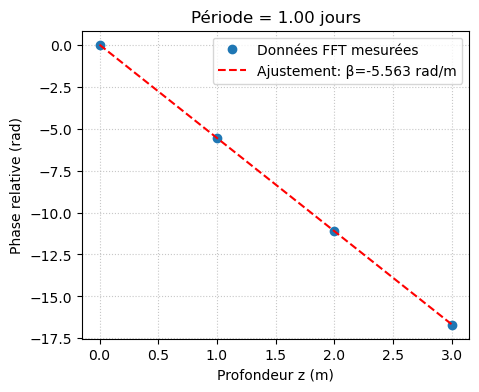

Période 1.00 jours: β = -5.563 rad/m


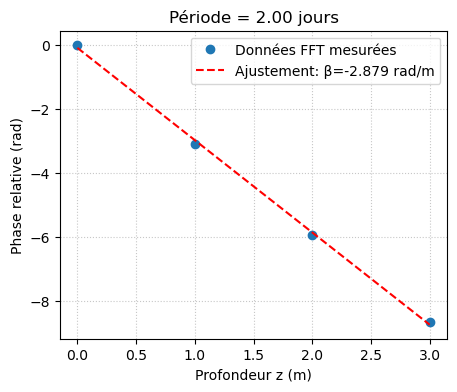

Période 2.00 jours: β = -2.879 rad/m


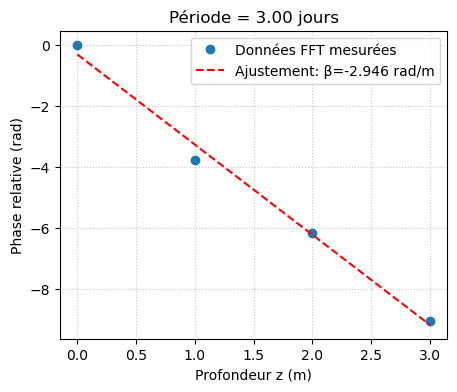

Période 3.00 jours: β = -2.946 rad/m


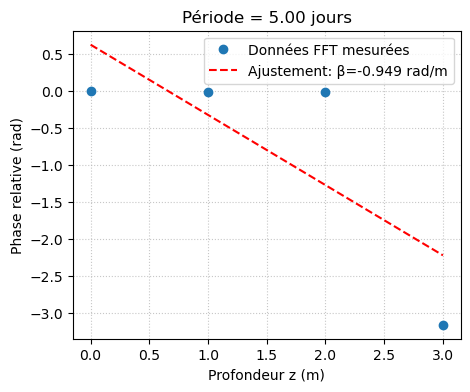

Période 5.00 jours: β = -0.949 rad/m
[np.float64(-5.562952946629457), np.float64(-2.878842668899577), np.float64(-2.9458002098759315), np.float64(-0.9493104928078727)]


In [210]:
# Pour chaque période, on essaye de faire passer un fit phi(z) = beta_z

# Pour chaque périod,
betas = []
for period, row in df_phase.iterrows():
    depths = np.array([0.0] + depth_sensors[:3], float)  # inclut rivière à z=0
    phases = row.values.astype(float)                     # [river, z1, z2, z3]
    m = np.isfinite(phases)
    if m.sum() < 2:
        betas.append(np.nan)
        continue
    coeffs = np.polyfit(depths[m], phases[m], 1)  # fit linéaire
    beta = coeffs[0]
    betas.append(beta)

    # Plotting for confirmation
    plt.figure(figsize=(5, 4))
    plt.plot(depths, phases, 'o', label='Données FFT mesurées')
    plt.plot(depths, np.polyval(coeffs, depths), 'r--', label=f'Ajustement: β={beta:.3f} rad/m')
    plt.xlabel('Profondeur z (m)')
    plt.ylabel('Phase relative (rad)')
    plt.title(f'Période = {period:.2f} jours')
    plt.legend()
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.show()
    print(f"Période {period:.2f} jours: β = {beta:.3f} rad/m")

print(betas)

Récapitulatif

In [215]:
a = np.array(a_values)
b = -np.array(betas)
vt_sur_kappa = (b**2 - a**2)/a

print("\n--- Comparaison des coefficients a et b ---")
print("a:", a)
print("b:", b)
print("Périodes (jours):", input_periods_days)
print("vt/κ:", vt_sur_kappa)


--- Comparaison des coefficients a et b ---
a: [0.63326396 0.14778739 0.10549868 0.0755125 ]
b: [5.56295295 2.87884267 2.94580021 0.94931049]
Périodes (jours): [1.0, 2.0, 3.0, 5.0]
vt/κ: [48.23489759 55.93098185 82.1489796  11.85880902]


### Inversion par résolution matricielle.

In [214]:
def inversion(a, b, P):

    # b(b^2 + a^2)/(2a) = pi/(kappa_e * P)
    kappa_e = (np.pi * 2 * a) / (P *  b * (b**2 + a**2))

    # (b^2 - a^2)/a = v_t/kappa_e
    v_t = kappa_e * (b**2 - a**2) / a

    return kappa_e, v_t

for a_val, b_val, P in zip(a, b, input_periods_days):
    kappa_e, v_t = inversion(a_val, b_val, P * 86400.0)
    print(f"Période {P:.2f} jours: kappa_e = {kappa_e:.3e} m²/s, v_t = {v_t:.3e} m/s")

Période 1.00 jours: kappa_e = 2.641e-07 m²/s, v_t = 1.274e-05 m/s
Période 2.00 jours: kappa_e = 2.246e-07 m²/s, v_t = 1.256e-05 m/s
Période 3.00 jours: kappa_e = 9.991e-08 m²/s, v_t = 8.208e-06 m/s
Période 5.00 jours: kappa_e = 1.276e-06 m²/s, v_t = 1.513e-05 m/s


## Verification

$$\kappa_e = \dfrac{\lambda_m}{\rho_m c_m} \qquad v_t = -\alpha_e \dfrac{dH}{dz}$$
Avec :
- $\alpha_e = \dfrac{\rho_m c_m}{\rho_w c_w}$


In [86]:
def kappa_e(poro, lambda_w, rho_w_c_w, lambda_s, rho_s_c_s):
    """
    Calcul de la diffusivité thermique effective kappa_e [m²/s]
    poro: porosité (0-1)
    lambda_w: conductivité thermique de l'eau [W/m/K]
    rho_w_c_w: capacité calorifique volumique de l'eau [J/m³/K]
    lambda_s: conductivité thermique des solides [W/m/K]
    rho_s_c_s: capacité calorifique volumique des solides [J/m³/K]
    n: indice de saturation hydraulique (0-1)
    q: vitesse d'écoulement verticale moyenne [m/s] (positive vers le bas)
    """
    term1 = (poro * lambda_w + (1 - poro) * lambda_s) / (poro * rho_w_c_w + (1 - poro) * rho_s_c_s)
    return term1

poro = 0.1
lambda_w = 0.6
rho_w_c_w = 4.18e6
lambda_s = 1.0
rho_s_c_s = 4e6

kappa_e = kappa_e(poro, lambda_w, rho_w_c_w, lambda_s, rho_s_c_s)
print(f"Estimated kappa_e = {kappa_e:.3e} m²/s")

Estimated kappa_e = 2.389e-07 m²/s
